# Midterm Skills Exam: Data Wrangling and Analysis


## Fetching the data

In [23]:
pip install ucimlrepo

In [30]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np


# fetch dataset
census_income = fetch_ucirepo(id=20)

# data (as pandas dataframes)
X = census_income.data.features
y = census_income.data.targets

# metadata
census_income.metadata

# variable information
census_income.variables

# Merged the datasets into one dataframe
df = pd.concat([X,y], axis = 1)
df


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


## Data Cleaning and Filtering

In this part of the code, I will remove and filter out the irrelevant data that may not be needed on the analysis later on.

In [31]:
# dropping the table fnlwgt and education num

df.drop(['fnlwgt','education-num'], axis=1, inplace=True)
df

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,Bachelors,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,HS-grad,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,Bachelors,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [33]:
# Cleaning unwanted dots in the column income using strip
df['income'] = df['income'].str.rstrip(".")
df

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,Bachelors,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,64,NaN,HS-grad,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K
48839,38,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,Bachelors,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


## Adding another column for the encoded variable to use for data analysis later on

In [37]:
from sklearn.preprocessing import LabelEncoder

cols_to_encode = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'native-country']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode each column in the list
for col in cols_to_encode:
    df[col+'_encoded'] = label_encoder.fit_transform(df[col])

In [38]:
df

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,workclass_encoded,education_encoded,marital-status_encoded,occupation_encoded,relationship_encoded,race_encoded,native-country_encoded
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,7,9,4,1,1,4,39
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,6,9,2,4,0,4,39
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,4,11,0,6,1,4,39
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,4,1,2,6,0,2,39
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,4,9,2,10,5,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,Bachelors,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K,4,9,0,10,1,4,39
48838,64,NaN,HS-grad,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K,9,11,6,15,2,2,39
48839,38,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K,4,9,2,10,0,4,39
48840,44,Private,Bachelors,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K,4,9,0,1,3,1,39


# Handling missing values

In [39]:
# for nan values
for column in ['workclass', 'occupation', 'native-country']:
    df[column].fillna(df[column].mode()[0], inplace=True)

# for '?' values
for column in ['workclass', 'occupation', 'native-country']:
    df[column].replace('?', df[column].mode()[0], inplace=True)


In [40]:
df.isnull().sum()

age                       0
workclass                 0
education                 0
marital-status            0
occupation                0
relationship              0
race                      0
sex                       0
capital-gain              0
capital-loss              0
hours-per-week            0
native-country            0
income                    0
workclass_encoded         0
education_encoded         0
marital-status_encoded    0
occupation_encoded        0
relationship_encoded      0
race_encoded              0
native-country_encoded    0
dtype: int64

# Exploratory Data Analysis

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

df.describe()

,age,capital-gain,capital-loss,hours-per-week,workclass_encoded,education_encoded,marital-status_encoded,occupation_encoded,relationship_encoded,race_encoded,native-country_encoded
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1079.067626,87.502314,40.422382,4.047889,10.288420,2.618750,6.874370,1.443287,3.668052,36.984972
std,13.710510,7452.019058,403.004552,12.391444,1.528374,3.874492,1.507703,4.284442,1.602151,0.845986,7.278644
min,17.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,0.000000,0.000000,40.000000,4.000000,9.000000,2.000000,3.000000,0.000000,4.000000,39.000000
50%,37.000000,0.000000,0.000000,40.000000,4.000000,11.000000,2.000000,7.000000,1.000000,4.000000,39.000000
75%,48.000000,0.000000,0.000000,45.000000,4.000000,12.000000,4.000000,10.000000,3.000000,4.000000,39.000000
max,90.000000,99999.000000,4356.000000,99.000000,9.000000,15.000000,6.000000,15.000000,5.000000,4.000000,42.000000


Seperate the numerical values and the categorical values for easy analysis and plotting of data.

In [46]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("The numerical values are:")
print(num_cols)

cat_cols = df.select_dtypes(include=['object']).columns
print("The categorical values are:")
print(cat_cols)

The numerical values are:
['age', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_encoded', 'education_encoded', 'marital-status_encoded', 'occupation_encoded', 'relationship_encoded', 'race_encoded', 'native-country_encoded']
The categorical values are:
Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income'],
      dtype='object')


A histogram and box plot is used to show the pattern of the variables, as some variables have skewness and outliers.

age
Skew : 0.56


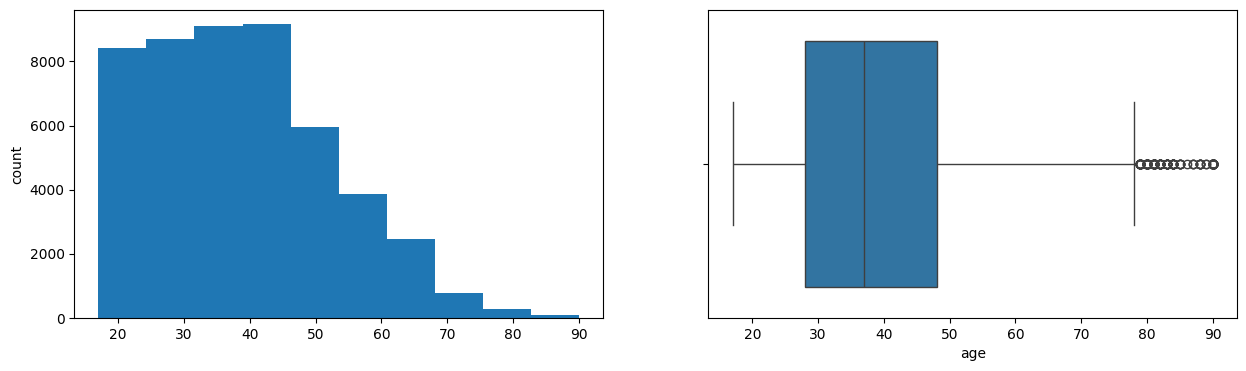

capital-gain
Skew : 11.89


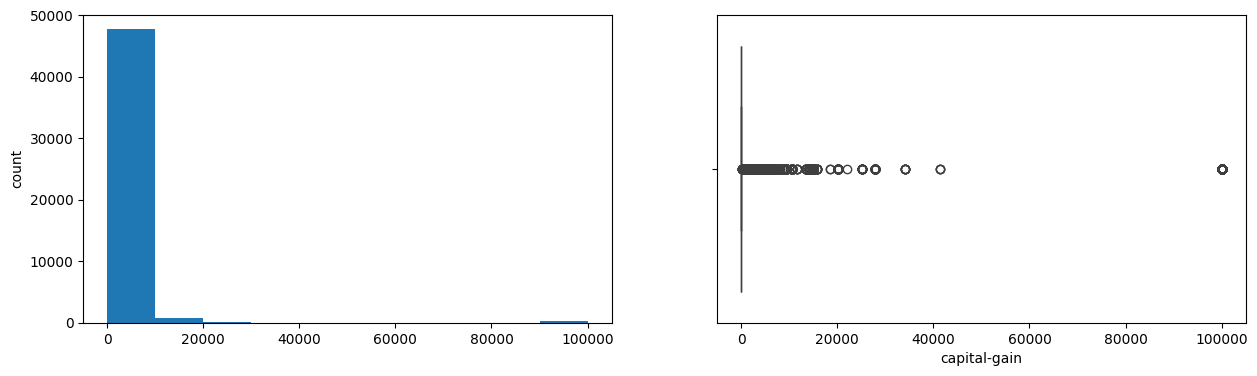

capital-loss
Skew : 4.57


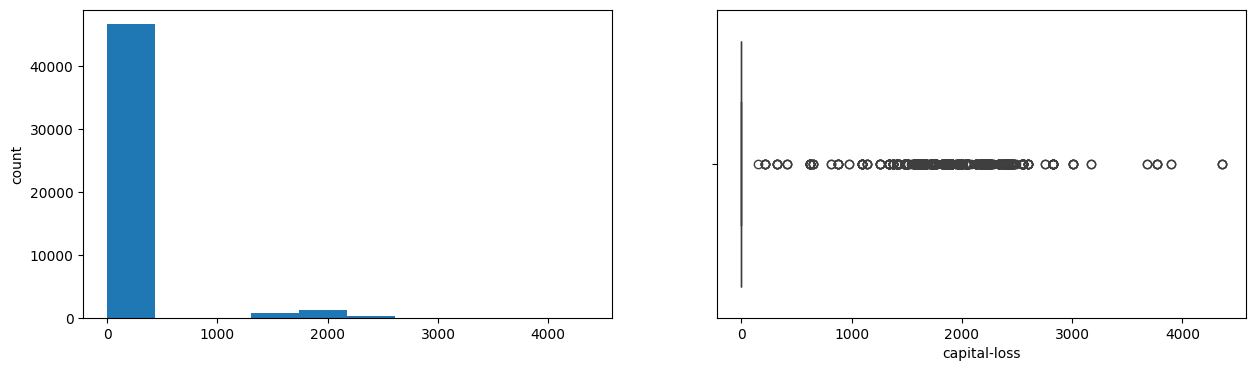

hours-per-week
Skew : 0.24


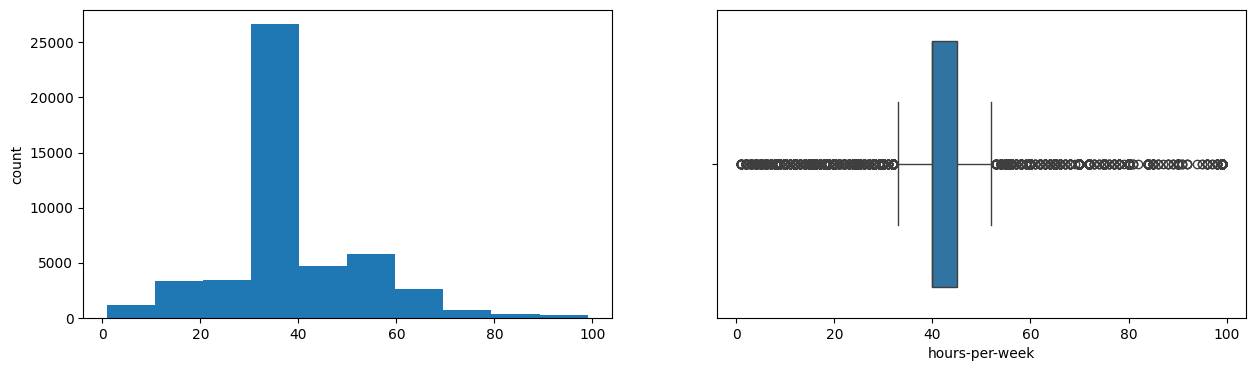

workclass_encoded
Skew : 0.06


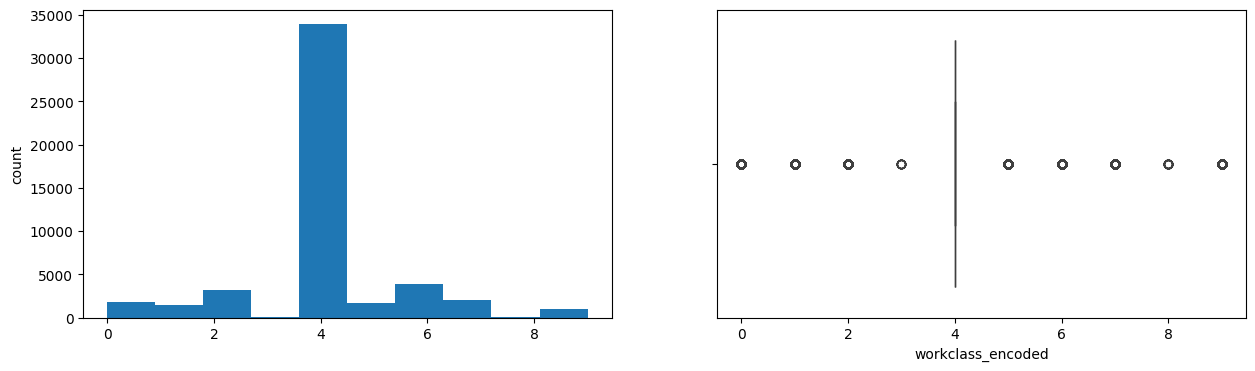

education_encoded
Skew : -0.94


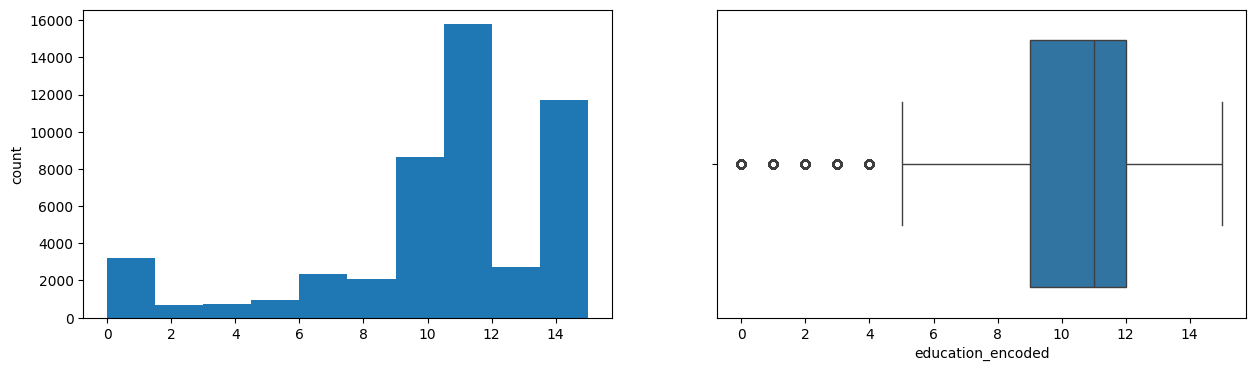

marital-status_encoded
Skew : -0.02


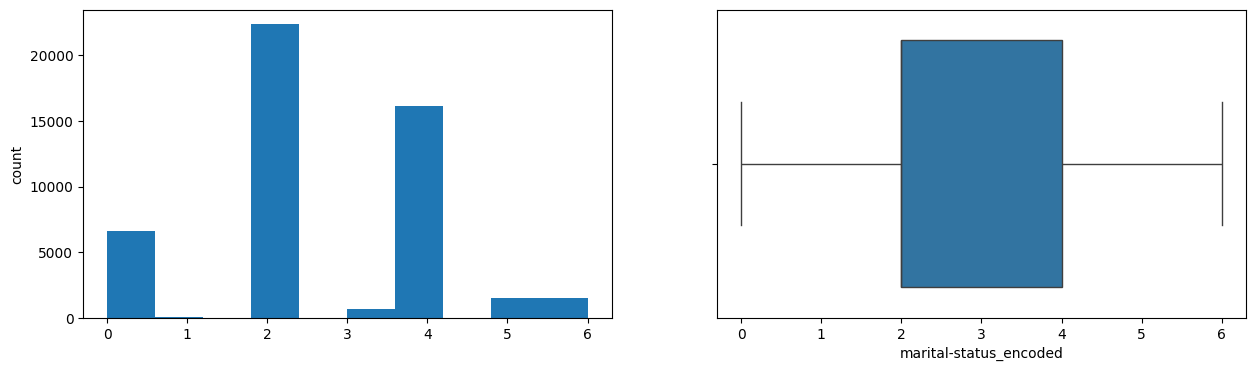

occupation_encoded
Skew : 0.12


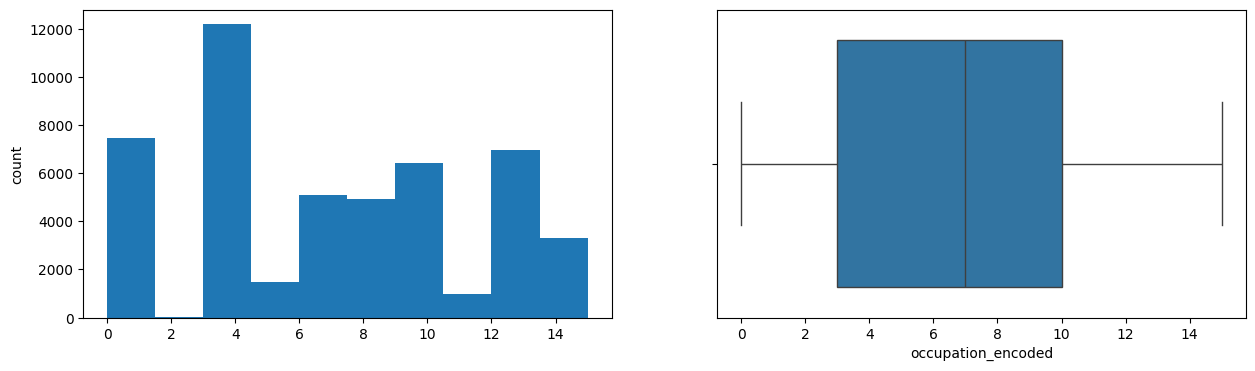

relationship_encoded
Skew : 0.79


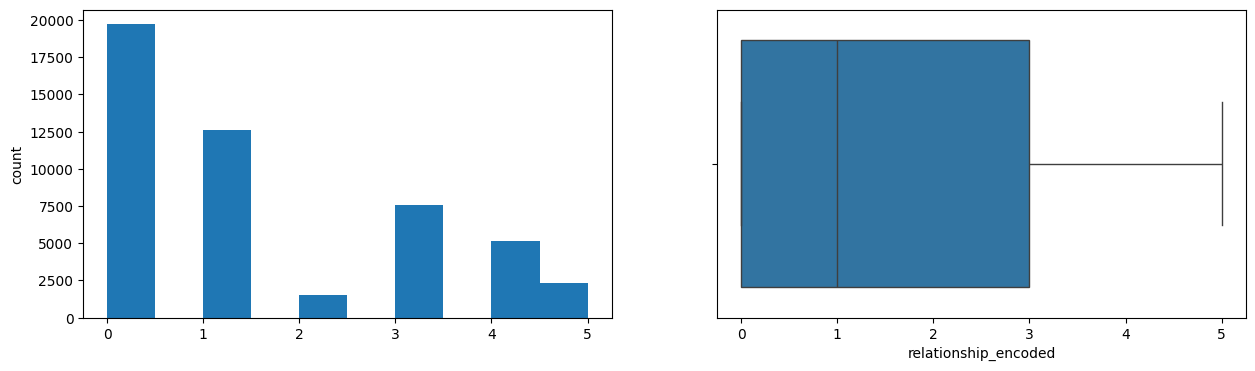

race_encoded
Skew : -2.45


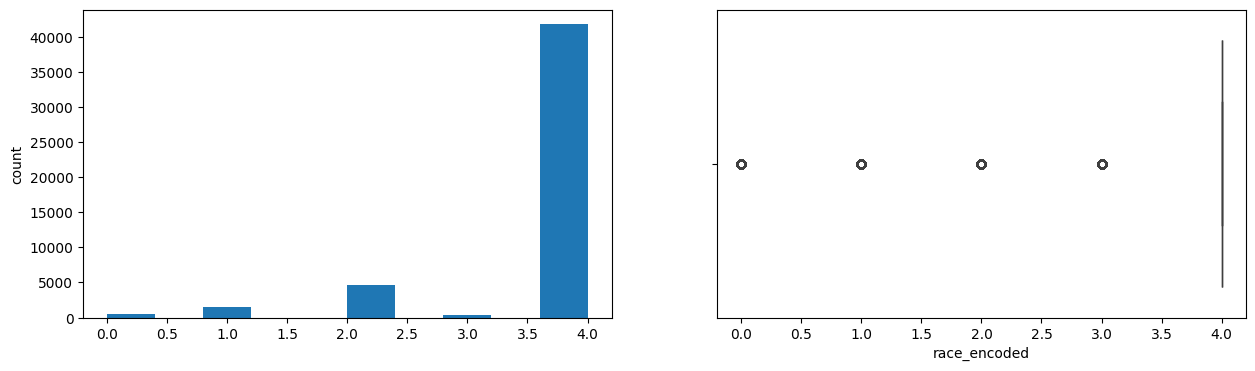

native-country_encoded
Skew : -3.87


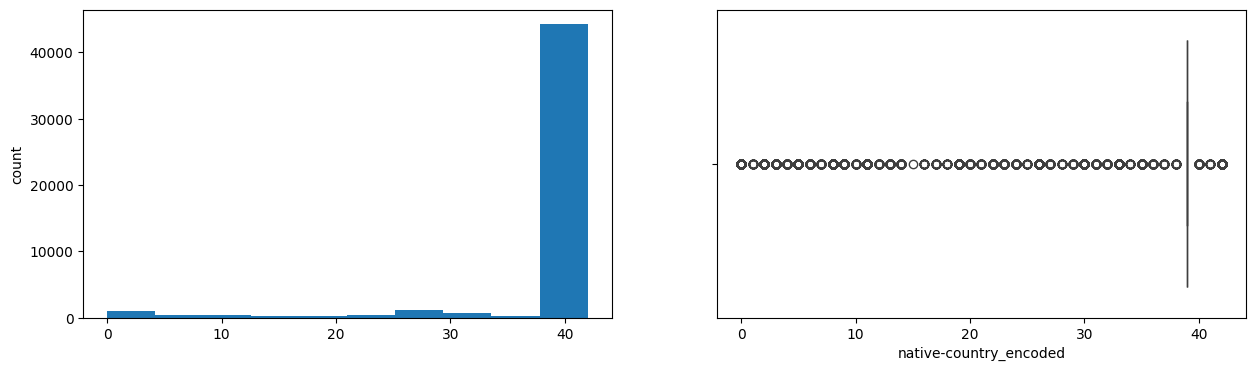

In [50]:
for col in num_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

Categorical variables are being visualized using a count plot. Categorical variables provide the pattern of factors influencing income

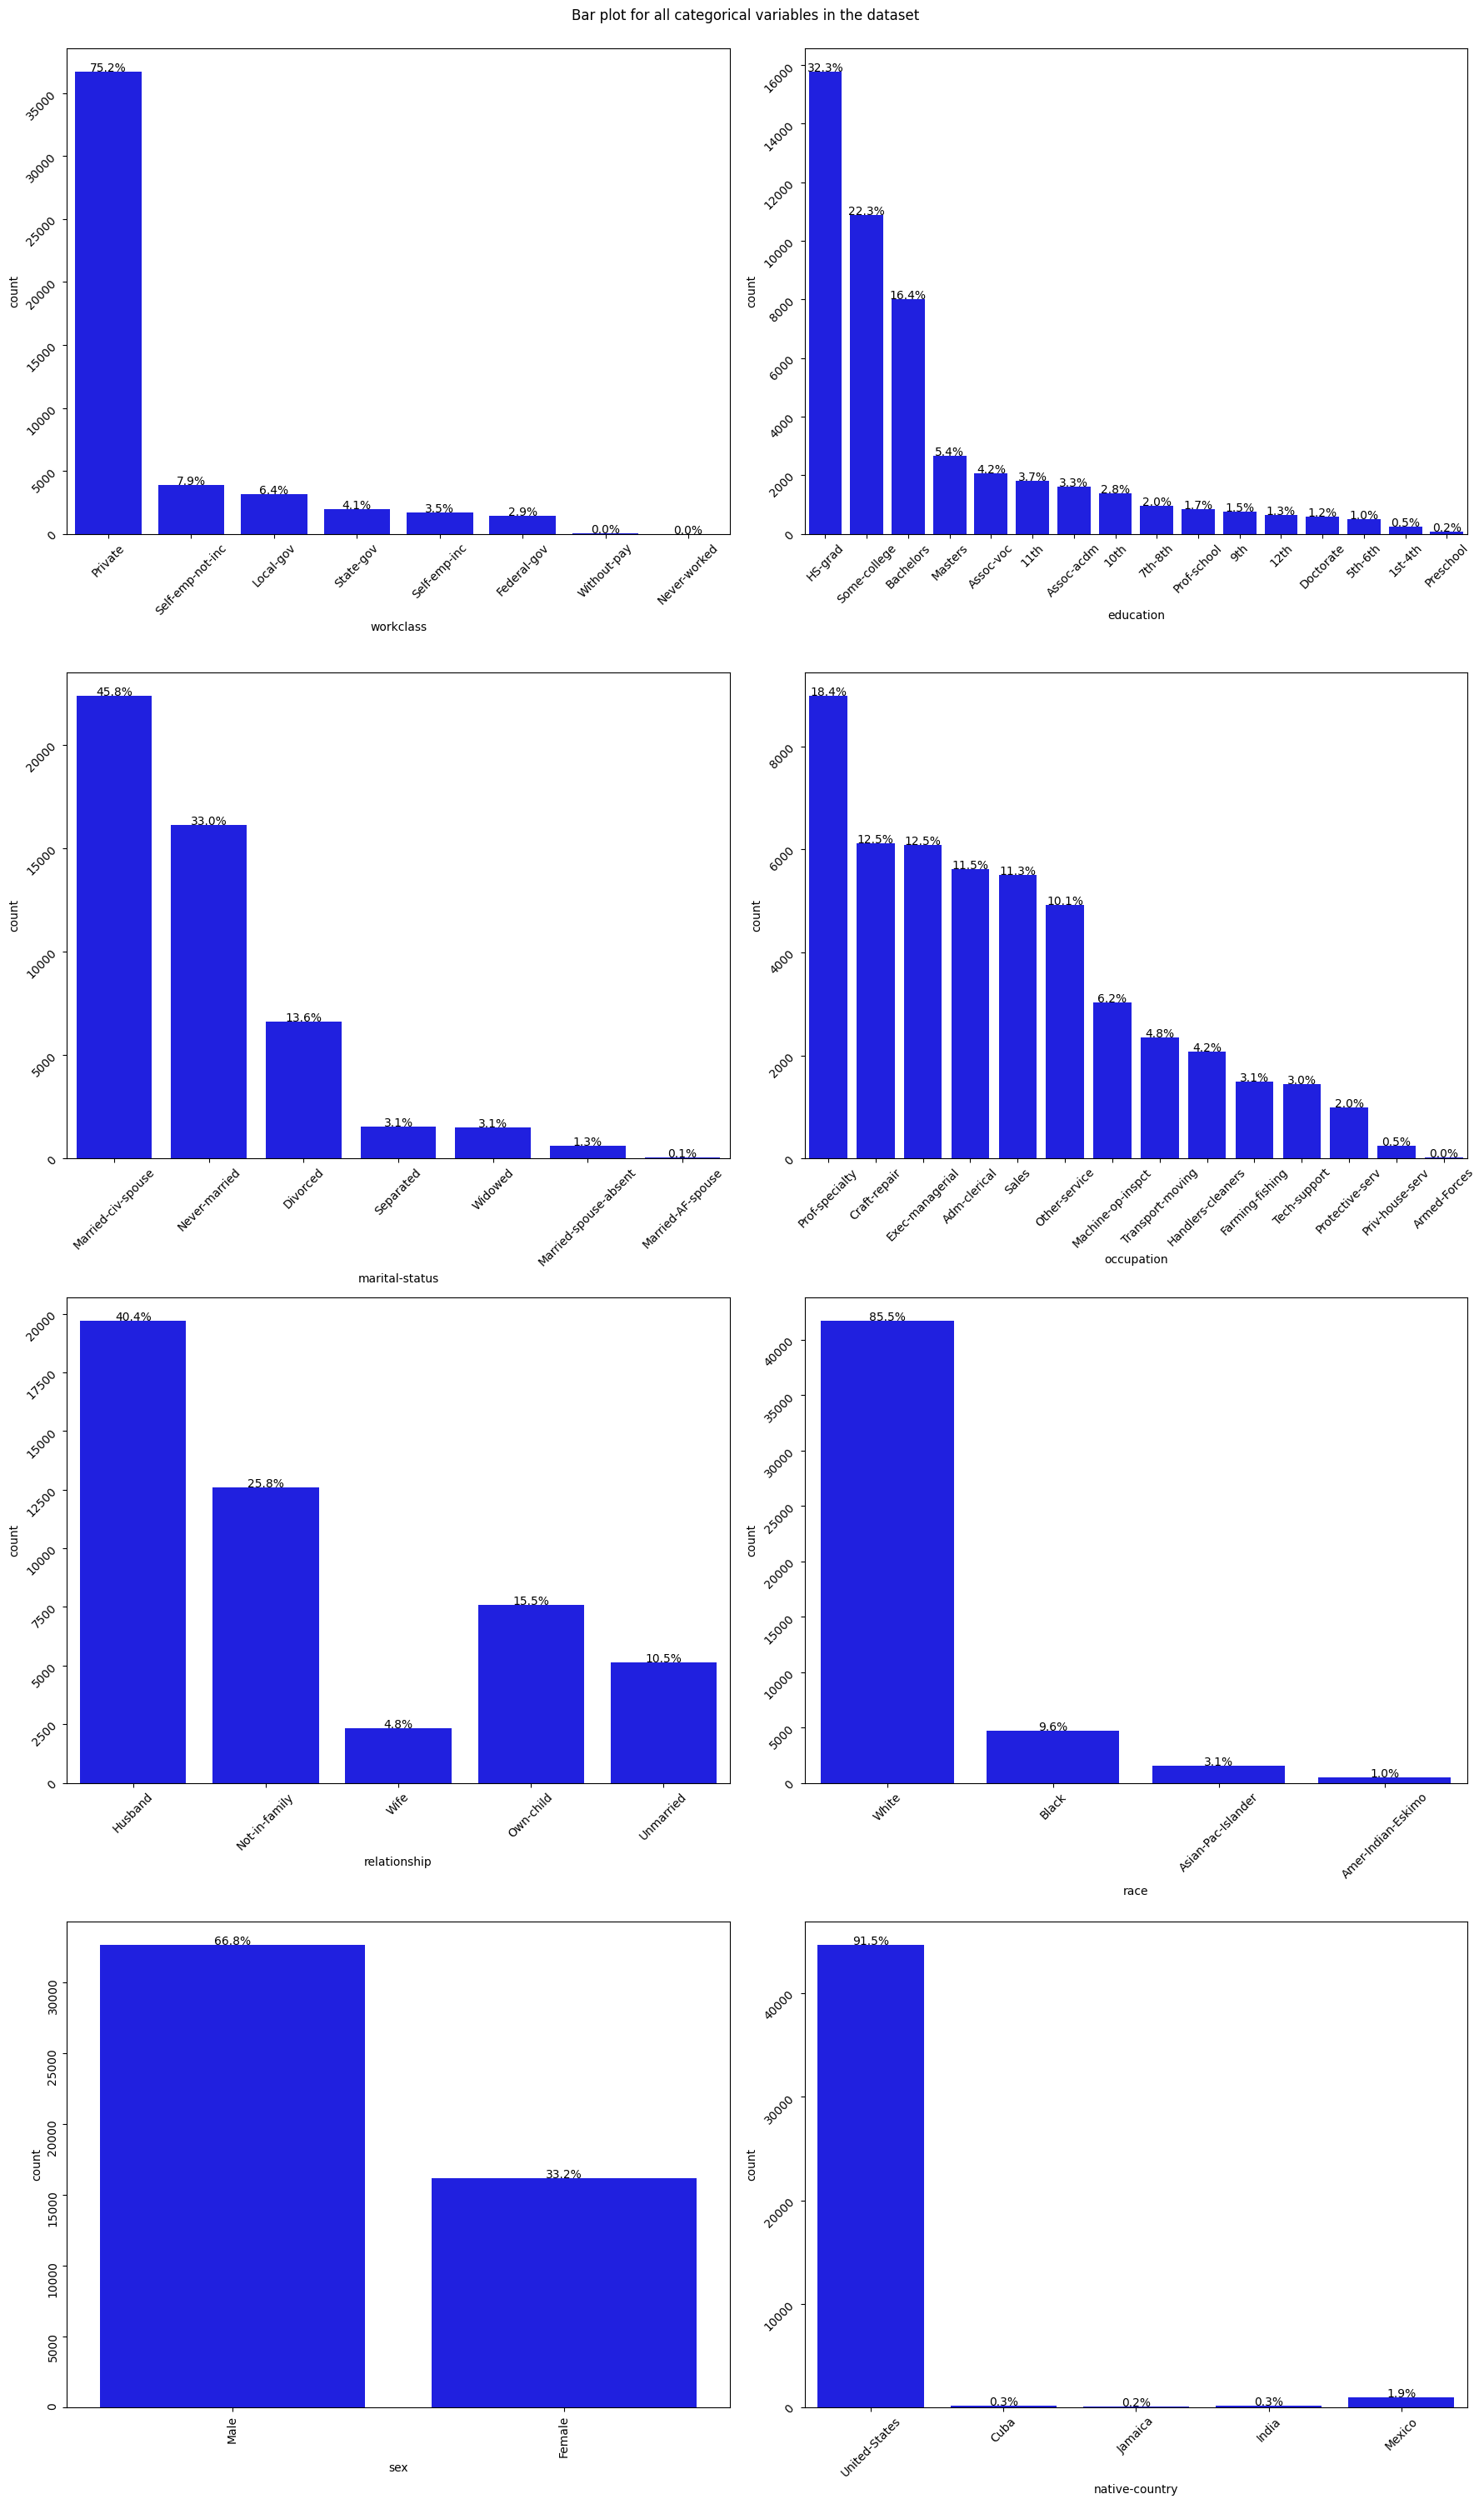

In [73]:
fig, axes = plt.subplots(4, 2, figsize = (18, 30))
fig.suptitle('Bar plot for all categorical variables in the dataset', y=1.0)


def add_percentage_annotations(ax, data, column):
    total = data[column].count()
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), ha='center')



sns.countplot(ax = axes[0, 0], x = 'workclass', data = df, color = 'blue',
              order = df['workclass'].value_counts().index);
add_percentage_annotations(axes[0, 0], df, 'workclass')

sns.countplot(ax = axes[0, 1], x = 'education', data = df, color = 'blue',
              order = df['education'].value_counts().index);
add_percentage_annotations(axes[0, 1], df, 'education')

sns.countplot(ax = axes[1, 0], x = 'marital-status', data = df, color = 'blue',
              order = df['marital-status'].value_counts().index);
add_percentage_annotations(axes[1, 0], df, 'marital-status')

sns.countplot(ax = axes[1, 1], x = 'occupation', data = df, color = 'blue',
              order = df['occupation'].value_counts().index);
add_percentage_annotations(axes[1, 1], df, 'occupation')

sns.countplot(ax = axes[2, 0], x = 'relationship', data = df, color = 'blue',
              order = df['relationship'].head(20).value_counts().index);
add_percentage_annotations(axes[2, 0], df, 'relationship')

sns.countplot(ax = axes[2, 1], x = 'race', data = df, color = 'blue',
              order = df['race'].head(20).value_counts().index);
add_percentage_annotations(axes[2, 1], df, 'race')

sns.countplot(ax=axes[3, 0], x='sex', data=df, color='blue',
              order=df['sex'].head(20).value_counts().index);
add_percentage_annotations(axes[3, 0], df, 'sex')

sns.countplot(ax=axes[3, 1], x='native-country', data=df, color='blue',
              order=df['native-country'].head(20).value_counts().index);
add_percentage_annotations(axes[3, 1], df, 'native-country')

axes[0][0].tick_params(labelrotation=45);
axes[0][1].tick_params(labelrotation=45);
axes[1][0].tick_params(labelrotation=45);
axes[1][1].tick_params(labelrotation=45);
axes[2][0].tick_params(labelrotation=45);
axes[2][1].tick_params(labelrotation=45);
axes[3][0].tick_params(labelrotation=90);
axes[3][1].tick_params(labelrotation=45);

plt.subplots_adjust(wspace=0.5, hspace=1) # Adjusts the horizontal and vertical spacing between subplots

plt.tight_layout() # Adjusts the layout to prevent overlapping
plt.show()

From the countplot, we can have below observations:

- 75.2% are in private sector
- 32.3% are graduated in High School
- 45.8% are married
- 18.4% have a professional specialty occupation
- 40.4% are husbands in a family
- 85.5% comes from the white race
- 66.8% are males
- 91.5% comes from their native country United States

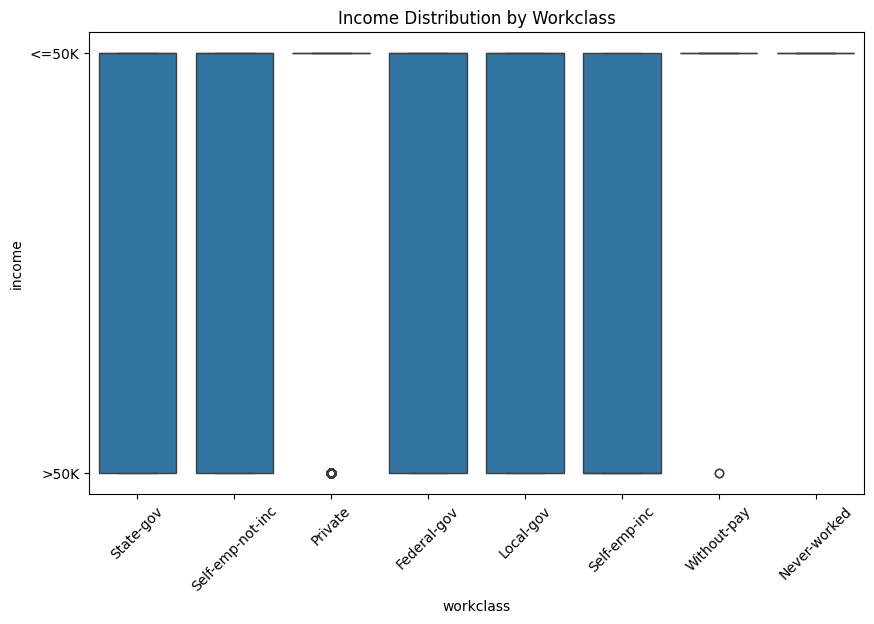

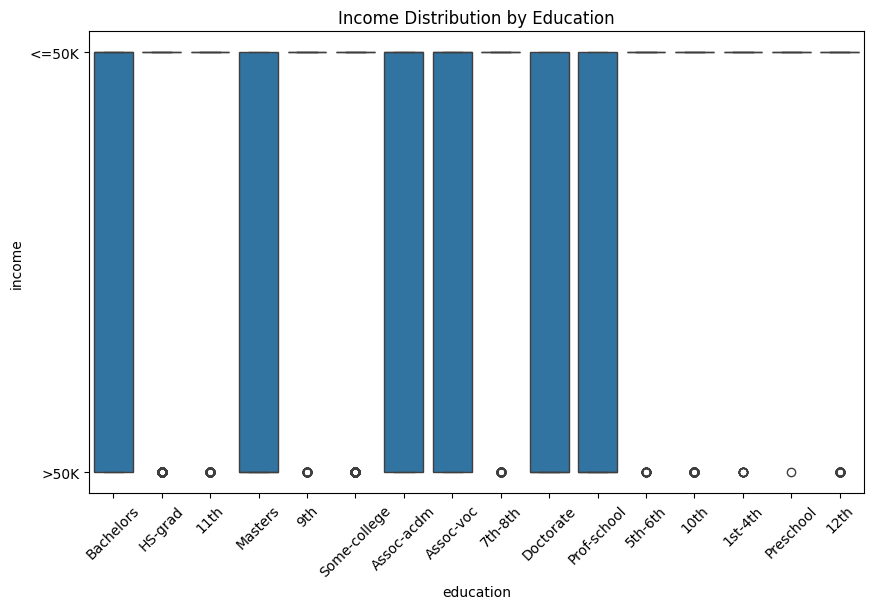

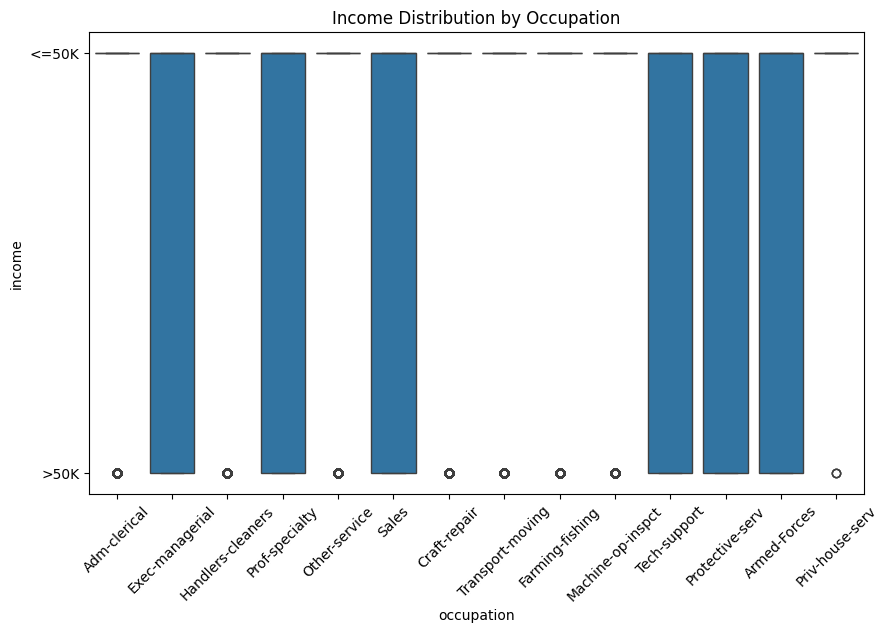

In [76]:
categorical_variables = ['workclass', 'education', 'occupation']

for variable in categorical_variables:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=variable, y='income', data=df)
    plt.title(f'Income Distribution by {variable.capitalize()}')
    plt.xticks(rotation=45)
    plt.show()

## Correlation Heatmap

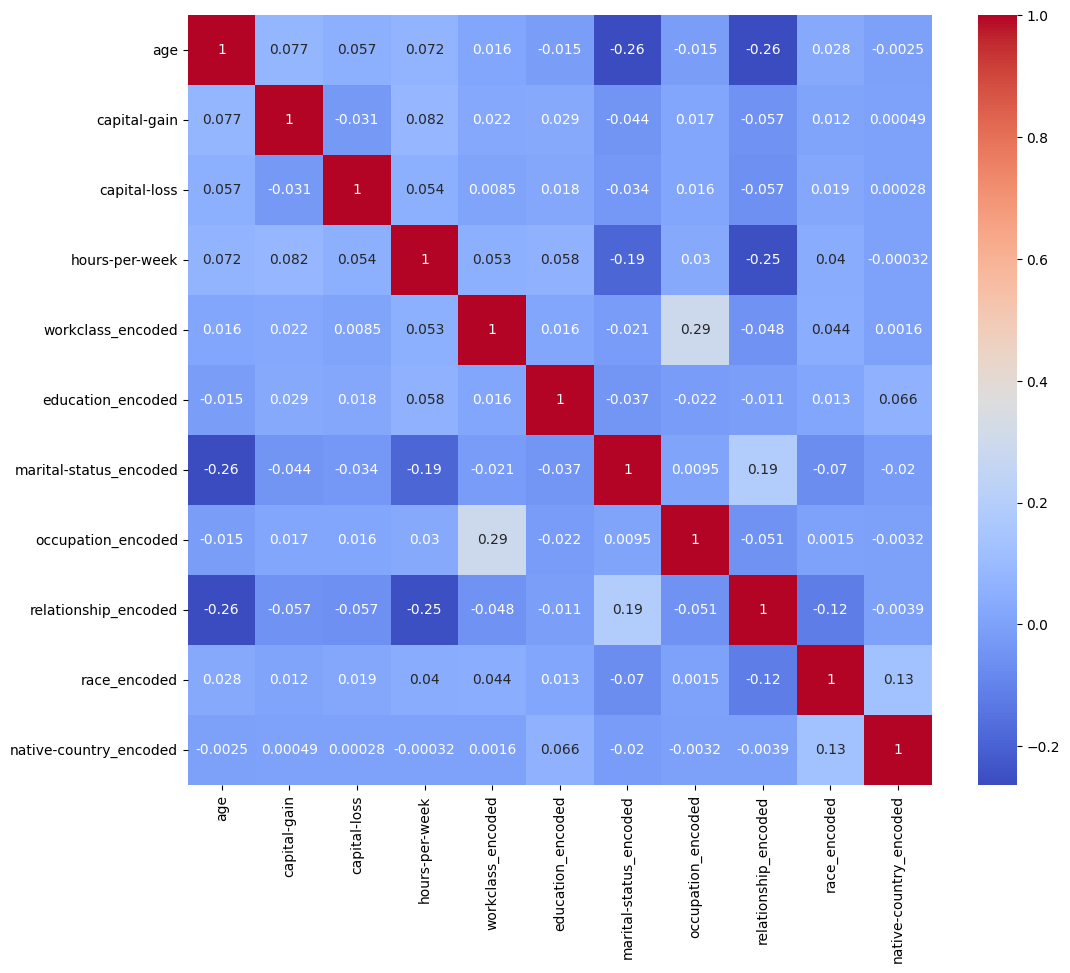

In [81]:
correlation_matrix = df[num_cols].corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()
